# Customer Segmentation
In this guided project, we’ll play the role of a data scientist working for a credit card company. The idea of the project is similar to what we've done during the course, but now we're using a different dataset with more variables. The dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

Luckily, the data engineering team has already cleaned most of the data so we can focus on building the best possible model to segment the data. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the K-means algorithm to segment the data.

The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

    - Analyze the dataset;
    - Prepare the data for modeling;
    - Find an appropriate number of clusters;
    - Segment the data;
    - Interpret and explain the results.

Here's the data dictionary:

| Column                    | Value Type | Description                                                                           |
|---------------------------|------------|---------------------------------------------------------------------------------------|
| `customer_id`             |            | unique identifier for each customer.                                                  |
| `age`                     |            | customer age in years.                                                                |
| `gender`                  |            | customer gender (M or F).                                                             |
| `dependent_count`         |            | number of dependents of each customer.                                                |
| `education_level`         |            | level of education ("High School", "Graduate", etc.).                                 |
| `marital_status`          |            | marital status ("Single", "Married", etc.).                                           |
| `estimated_income`        |            | the estimated income for the customer projected by the data science team.             |
| `months_on_book`          |            | time as a customer in months.                                                         |
| `total_relationship_count`|            | number of times the customer contacted the company.                                   |
| `months_inactive_12_mon`  |            | number of months the customer did not use the credit card in the last 12 months.      |
| `credit_limit`            |            | customer's credit limit.                                                              |
| `total_trans_amount`      |            | the overall amount of money spent on the card by the customer.                        |
| `total_trans_count`       |            | the overall number of times the customer used the card.                               |
| `avg_utilization_ratio`   |            | daily average utilization ratio.                                                      |


### Instructions
- Import pandas, numpy, matplotlib, seaborn, and the KMeans() and StandardScaler() classes from scikit-learn.
- Read the 'customer_segmentation.csv' into a pandas DataFrame.
- Familiarize ourselves with the dataset. Answer questions such as:
- How big is the dataset? How many columns does it have? Do we see any particular column that doesn't use the analysis?
- What's the type of data contained in each column? Are there many categorical variables? How are we dealing with them?
- Are there any missing values?
- Look at the correlation between the columns and explain what we see.
- Plot the distribution of each numeric column and comment on the results.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("customer_segmentation.csv")
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [102]:
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [103]:
missing_values = df.isnull().sum()
print(missing_values.sum())

0


## Feature Engineering

| Categorical Columns| Values   | Encoding Method |
|--------------------|----------|-----------------|
| `gender`           | `M`, `F` | Binary          |
| `marital_status`   | `Single`, `Married`, `Divorced`, `Unknown` | One-Hot |
| `education_level`  | `Uneducated`, `High School`, `College`, `Graduate`, `Post-Graduate`, `Doctorate`|Ordinal|

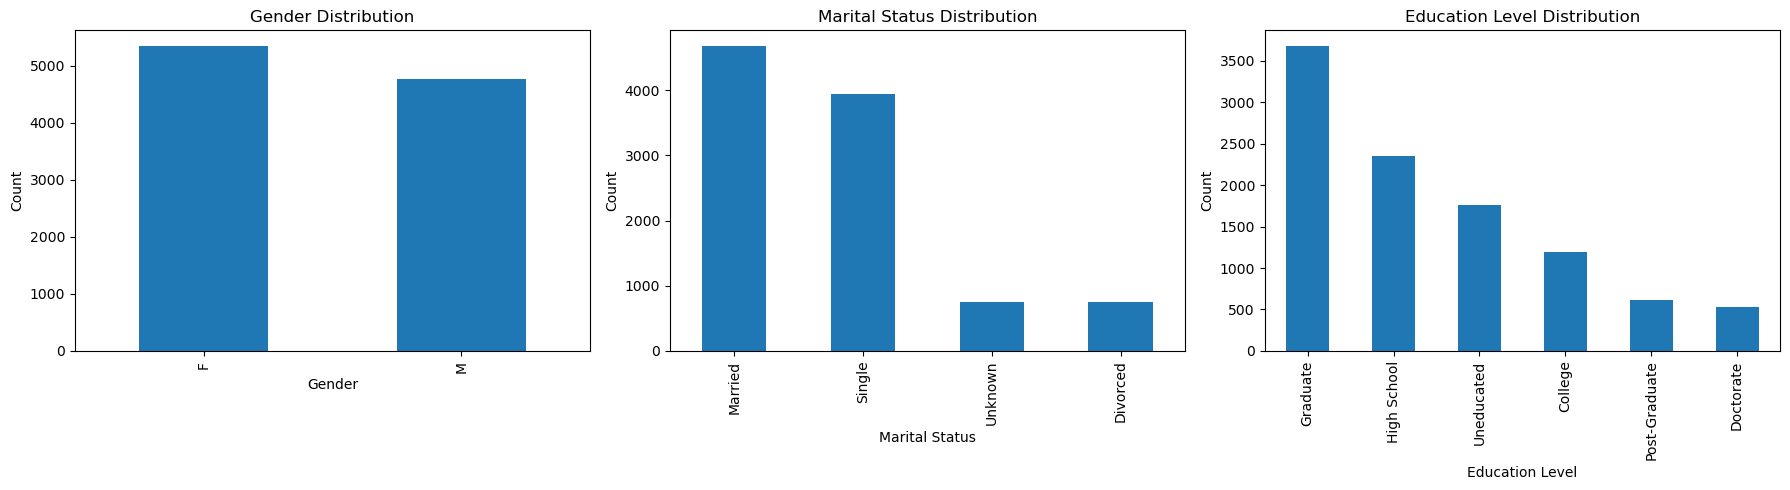

In [104]:
# Create a 1 row, 3 column grid
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the Gender Distribution
df["gender"].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot the Marital Status Distribution
df["marital_status"].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Marital Status Distribution')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Count')

# Plot the Education Level Distribution
df["education_level"].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Education Level Distribution')
axes[2].set_xlabel('Education Level')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


In [105]:
df_mod = df.copy().drop(columns = ["customer_id"])

## Value maps for gender and education_level columns
gender_map = {"M": 0, "F": 1}

education_map = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Graduate": 4,
    "Doctorate": 5}

## Apply mapping for gender and education_level columns
df_mod["gender"] = df_mod["gender"].map(gender_map) 
df_mod["education_level"] = df_mod["education_level"].map(education_map) 

## Apply one-hot encoding for marital_status column 
mar_status_dummies = pd.get_dummies(df_mod["marital_status"], prefix = 'marstatus')
df_mod = df_mod.drop(columns = ["marital_status"])
df_mod = df_mod.join(mar_status_dummies)

df_mod.columns

Index(['age', 'gender', 'dependent_count', 'education_level',
       'estimated_income', 'months_on_book', 'total_relationship_count',
       'months_inactive_12_mon', 'credit_limit', 'total_trans_amount',
       'total_trans_count', 'avg_utilization_ratio', 'marstatus_Divorced',
       'marstatus_Married', 'marstatus_Single', 'marstatus_Unknown'],
      dtype='object')

## Data Scaling

### Assessing numeric column value distribution

In [106]:
df_numeric = df_mod.drop(columns = ["gender", "education_level"])
col_summary = df_numeric.describe().round(2)
col_summary

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,62078.21,35.93,3.81,2.34,8631.95,4404.09,64.86,0.27
std,8.02,1.30,39372.86,7.99,1.55,1.01,9088.78,3397.13,23.47,0.28
min,26.00,0.00,20000.00,13.00,1.00,0.00,1438.30,510.00,10.00,0.00
25%,41.00,1.00,32000.00,31.00,3.00,2.00,2555.00,2155.50,45.00,0.02
50%,46.00,2.00,50000.00,36.00,4.00,2.00,4549.00,3899.00,67.00,0.18
75%,52.00,3.00,80000.00,40.00,5.00,3.00,11067.50,4741.00,81.00,0.50
max,73.00,5.00,200000.00,56.00,6.00,6.00,34516.00,18484.00,139.00,1.00


/tmp/ipykernel_22357/2826680968.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_mod.hist(ax = ax)


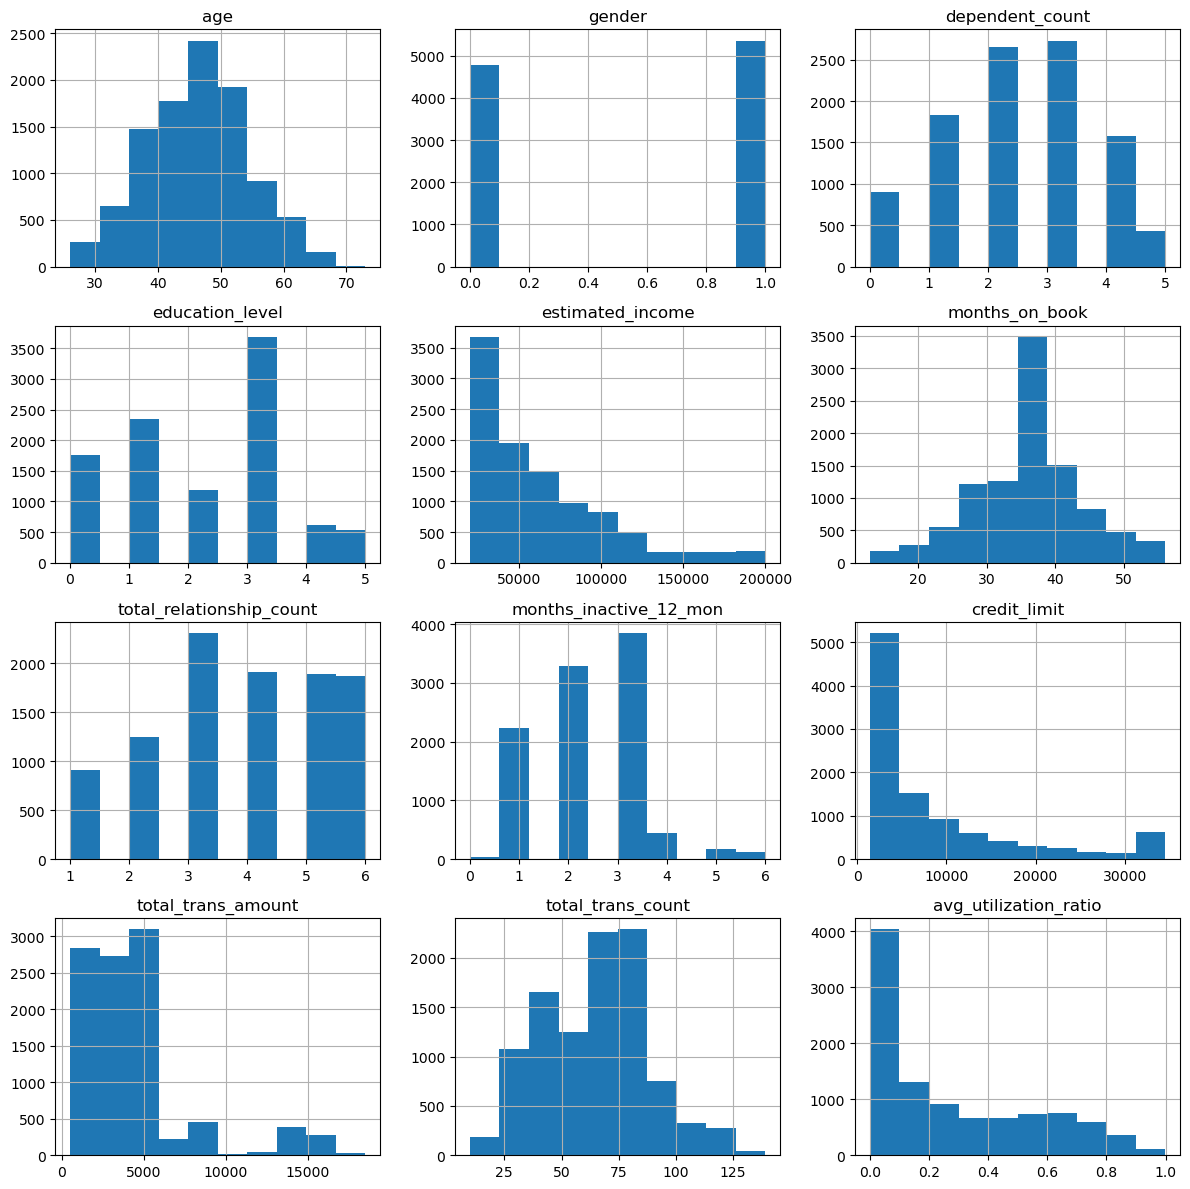

In [116]:
fig, ax = plt.subplots(figsize=(12, 12))

df_mod.hist(ax = ax)
plt.tight_layout()
plt.show()

### Apply data scaling

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_mod)

df_scaled = pd.DataFrame(scaler.transform(df_mod))
df_scaled.columns = df_mod.columns
scaled_summary = df_scaled.describe().round(2)
scaled_summary

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marstatus_Divorced,marstatus_Married,marstatus_Single,marstatus_Unknown
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.54,-1.06,-1.81,-1.46,-1.07,-2.87,-1.81,-2.32,-0.79,-1.15,-2.34,-1.00,-0.28,-0.93,-0.80,-0.28
25%,-0.66,-1.06,-1.04,-0.75,-0.76,-0.62,-0.52,-0.34,-0.67,-0.66,-0.85,-0.91,-0.28,-0.93,-0.80,-0.28
50%,-0.04,0.94,-0.27,-0.04,-0.31,0.01,0.12,-0.34,-0.45,-0.15,0.09,-0.36,-0.28,-0.93,-0.80,-0.28
75%,0.71,0.94,0.50,0.66,0.46,0.51,0.76,0.65,0.27,0.10,0.69,0.83,-0.28,1.08,1.25,-0.28
max,3.33,0.94,2.04,2.08,3.50,2.51,1.41,3.62,2.85,4.14,3.16,2.63,3.54,1.08,1.25,3.54


## Train K-Means Model

### Determine K, assess model inertias

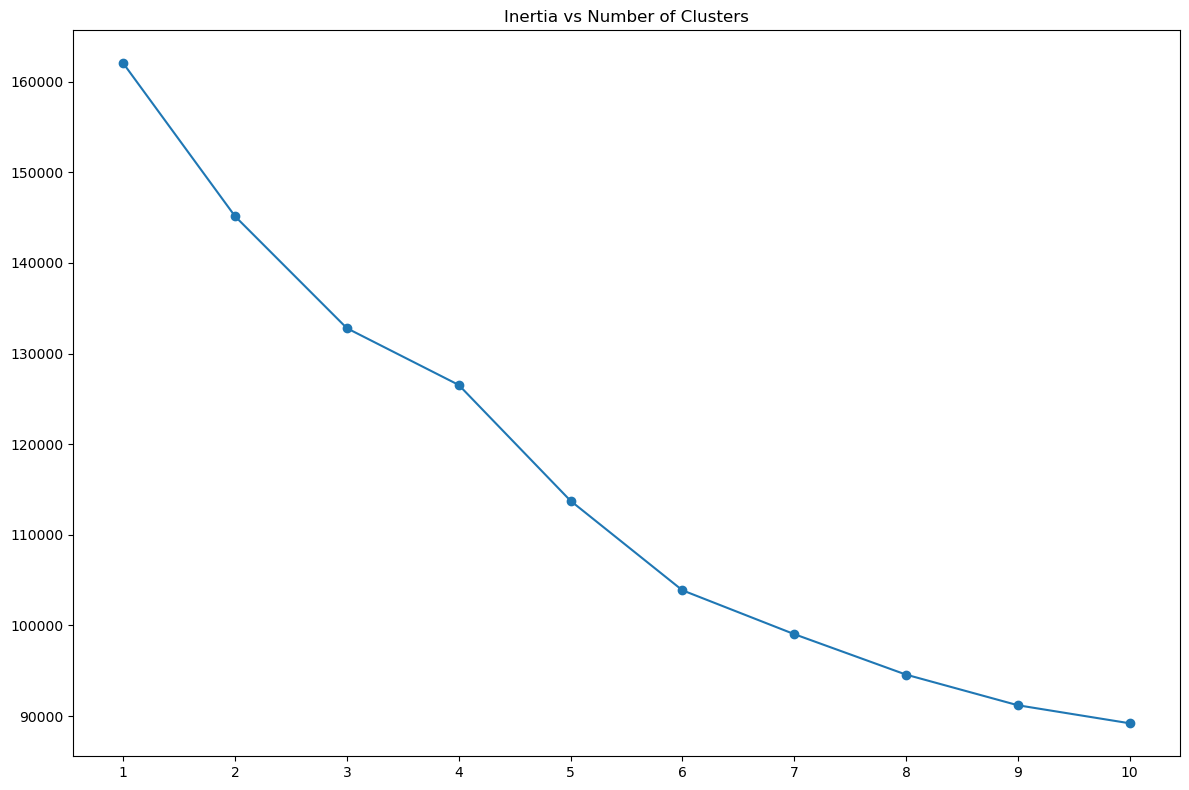

[162032.0, 145143.39263054542, 132795.52991544578, 126535.11159684724, 113749.70557321444, 103874.7614052275, 99036.11665771136, 94567.31674666295, 91185.6712407204, 89196.98222047336]


In [109]:
from sklearn.cluster import KMeans

def plot_elbow_curve(df, max_clusters = 10):
    
    inertias = []

    for k in range(1, max_clusters + 1):
        model = KMeans(n_clusters = k)
        cluster = model.fit_predict(df)
        inertias.append(model.inertia_)
        
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, max_clusters + 1), inertias, marker = 'o')
    plt.xticks(ticks = range(1, max_clusters + 1), labels = range(1, max_clusters + 1))
    plt.title('Inertia vs Number of Clusters')

    plt.tight_layout()
    plt.show()
    
    return inertias

inertias = plot_elbow_curve(df_scaled)
print(inertias)

### Instantiate model with K = 6

In [110]:
model = KMeans(n_clusters = 6)
clusters = model.fit_predict(df_scaled)

df_clustered = df.copy()
df_clustered = df_clustered.drop(columns = ["customer_id"])
df_clustered["cluster"] = clusters + 1
df_clustered["cluster"].value_counts()

cluster
1    3261
2    2883
5    1638
3     867
6     740
4     738
Name: count, dtype: int64

## Analyzing Results
All that's left now is to analyze the results. We need to see how the variables used in the clusterization differ from cluster to cluster in order better explain what each cluster represents.

We should note the most important characteristics of each cluster and how they can impact the business and marketing strategies for each type of customer.

### Instructions
1. Create a new column called CLUSTER in the original customers DataFrame. This column should contain the cluster assigned to each customer by the algorithm.
2. Group each numeric variable by the CLUSTER column and plot a bar chart. Analyze the clusters' characteristics regarding each variable. Explain the conclusions.
3. Create a scatter plot with different colors for each cluster of pairs of variables with a high correlation. Use seaborn.scatterplot() function with the hue parameter.
4. Use the [pandas.crosstab()] (https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function to calculate the percentual distribution of each variable per cluster for the categorical columns. Use this data to plot a stacked bar chart.
5. Explain the conclusions about each cluster: What are their main characteristics? How do they differ from the others? Can we make a business suggestion for each cluster?

In [111]:
df_clustered.head()

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,cluster
0,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,5
1,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,2
2,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,5
3,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,6
4,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,1


### Numeric Columns

In [112]:
numeric_columns = df_clustered.drop(columns = ['marital_status', 'gender', 'education_level', "cluster"]).columns
print(len(numeric_columns))

10


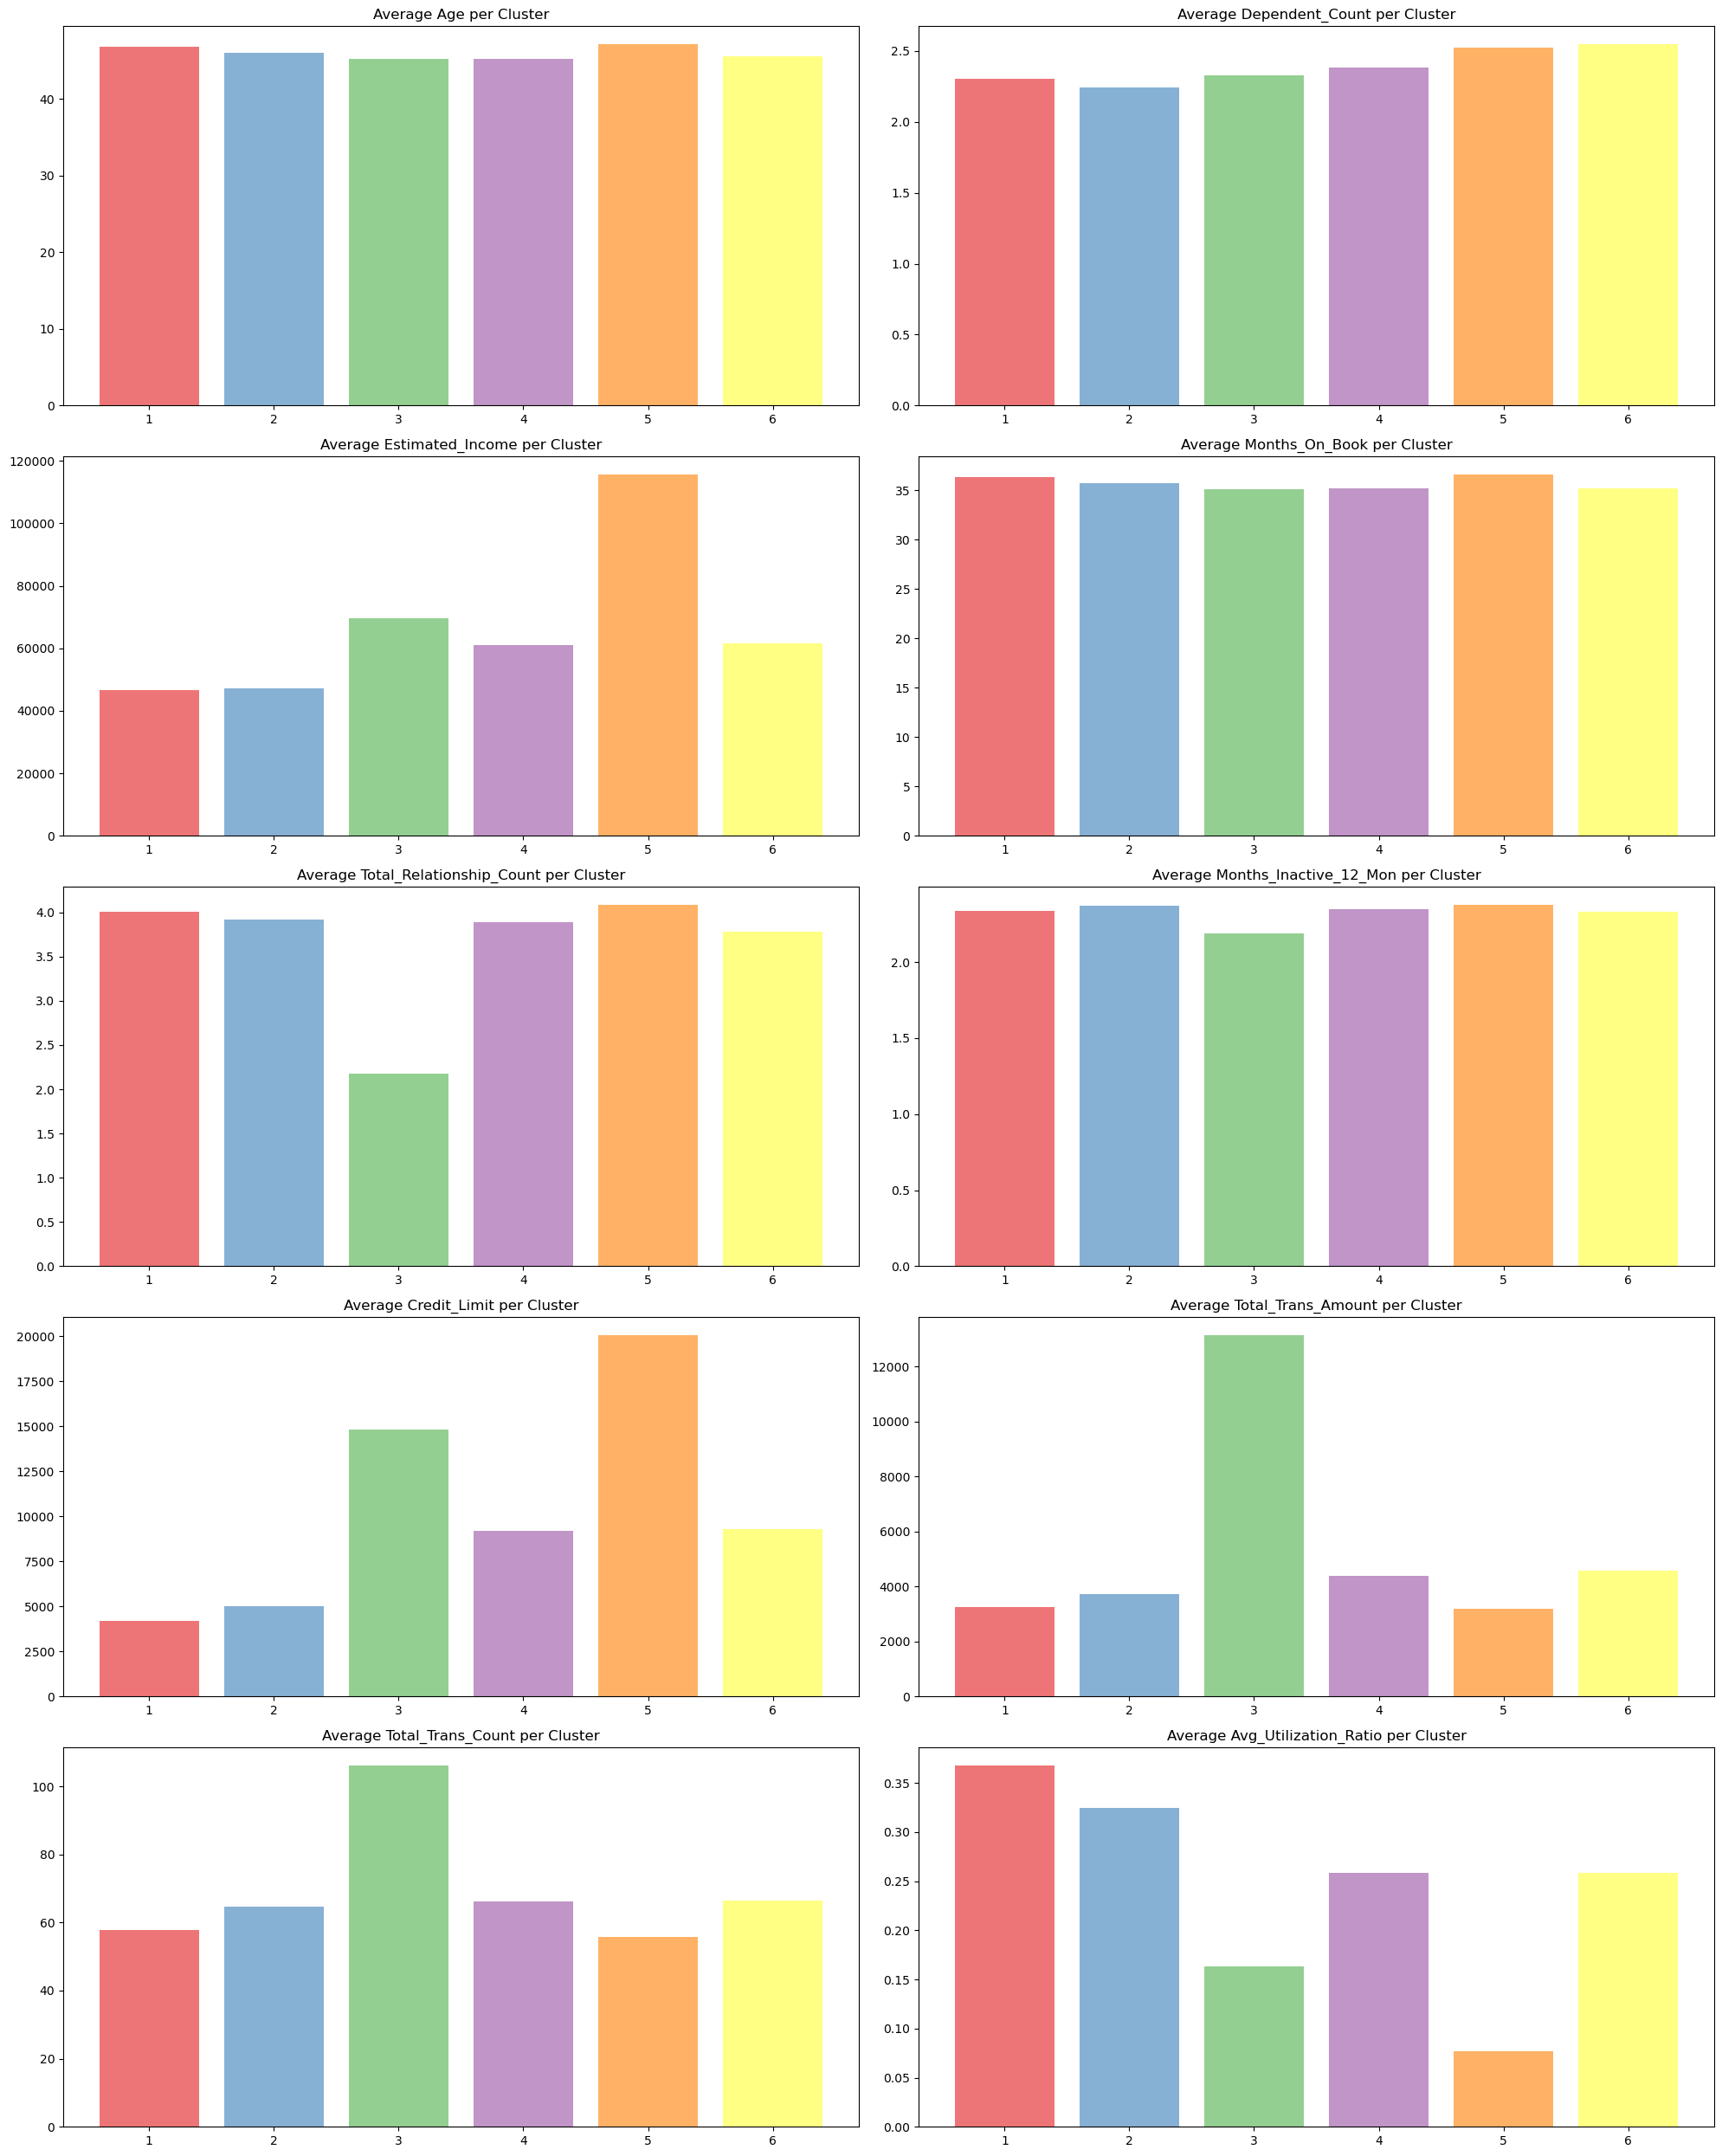

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def cluster_numeric_col_distribution(df, numeric_columns):
    
    # Determine the number of rows needed
    num_plots = len(numeric_columns)
    num_cols = 2
    num_rows = math.ceil(num_plots / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize = (20, 5 * num_rows))
    
    # If there's only one plot, convert axes to a list
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()  # Flatten axes array for easy iteration
    
    for i, column in enumerate(numeric_columns):
        df_plot = df.groupby('cluster')[column].mean()
        ax = axes[i]
        ax.bar(df_plot.index, df_plot, color = sns.color_palette('Set1'), alpha = 0.6)
        ax.set_title(f'Average {column.title()} per Cluster')
        ax.xaxis.grid(False)
    
    # Hide any unused subplots
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# Example usage
cluster_numeric_col_distribution(df_clustered, numeric_columns)


### Focused Investigation

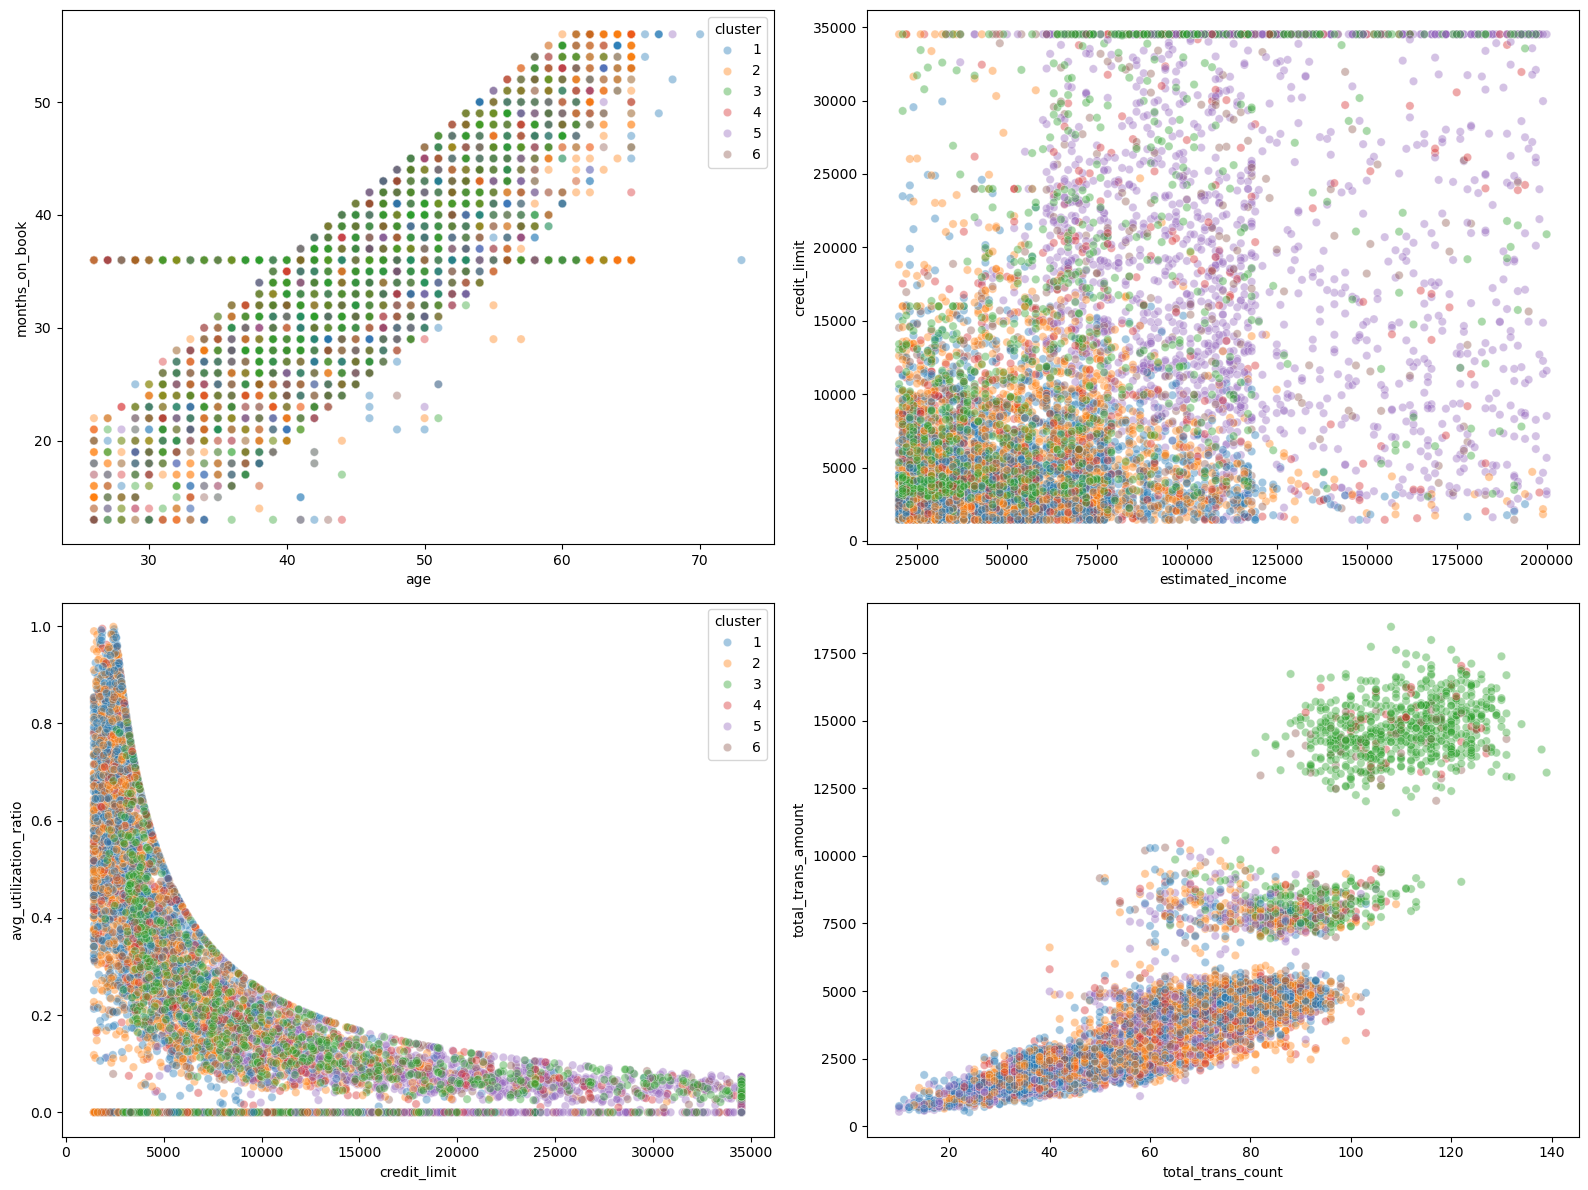

In [121]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# sns.scatterplot(x='age', y='months_on_book', hue='cluster', data=df_clustered, palette='tab10', alpha=0.4, ax=ax1)
# sns.scatterplot(x='estimated_income', y='credit_limit', hue='cluster', data=df_clustered, palette='tab10', alpha=0.4, ax=ax2, legend=False)
# sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='cluster', data=df_clustered, palette='tab10', alpha=0.4, ax=ax3)
# sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='cluster', data=df_clustered, palette='tab10', alpha=0.4, ax=ax4, legend=False)

# plt.tight_layout()
# plt.show()